In [1]:
!pip install pydicom

In [3]:
import sys
!{sys.executable} -m pip install pydicom


  Using cached pydicom-3.0.1-py3-none-any.whl.metadata (9.4 kB)
Using cached pydicom-3.0.1-py3-none-any.whl (2.4 MB)


In [6]:
import sys
!{sys.executable} -m pip install matplotlib


  Using cached matplotlib-3.10.7-cp310-cp310-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_10_9_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp310-cp310-macosx_10_9_x86_64.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-macosx_10_9_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp310-cp310-macosx_10_12_x86_64.whl (8.2 MB)
Using cached contourpy-1.3.2-cp310-cp310-macosx_10_9_x86_64.whl (268 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp310-cp310-macosx_10_9_x86_64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp310-cp310-macosx_10_9_x86_64.whl (66 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]


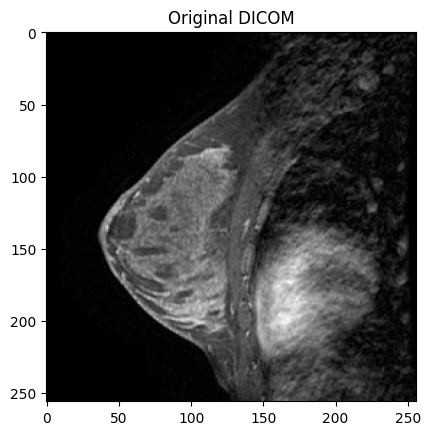

In [7]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# 读取 dicom
ds = pydicom.dcmread("DIP Project/data/unknown-5.dcm")
image = ds.pixel_array

plt.imshow(image, cmap='gray')
plt.title("Original DICOM")
plt.show()


In [8]:
!pip install opencv-python

In [10]:
import sys
!{sys.executable} -m pip install opencv-python


  Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_x86_64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_x86_64.whl (57.3 MB)


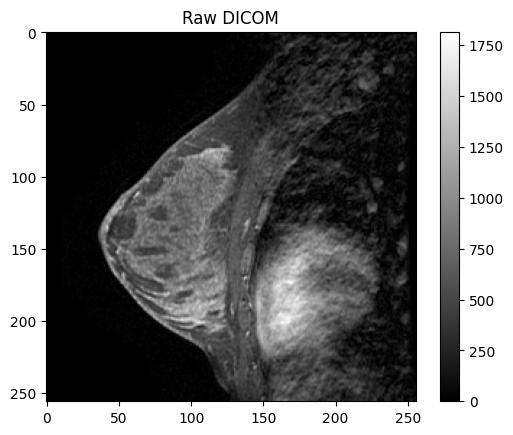

In [12]:
# cell: 读取 DICOM 并显示
import pydicom, matplotlib.pyplot as plt, numpy as np
import cv2, os

dcm_path = "DIP Project/data/unknown-5.dcm"  # 替换成你的文件名
ds = pydicom.dcmread(dcm_path)
img = ds.pixel_array.astype(np.float32)

plt.imshow(img, cmap='gray')
plt.title("Raw DICOM")
plt.colorbar()
plt.show()

In [13]:
# cell: 归一化并保存为 PNG（8-bit）
img_norm = (img - img.min()) / (img.max() - img.min() + 1e-8)  # 0..1
img8 = (img_norm * 255).astype('uint8')
img_rgb = cv2.cvtColor(img8, cv2.COLOR_GRAY2BGR)
os.makedirs("images_png", exist_ok=True)
cv2.imwrite("DIP Project/images_png/unknow-5.png", img_rgb)


True

In [15]:
import sys
!{sys.executable} -m pip install git+https://github.com/facebookresearch/segment-anything.git


  Cloning https://github.com/facebookresearch/segment-anything.git to /private/var/folders/q8/1g58_84s56jf8kkyxfygrygw0000gn/T/pip-req-build-ixws4ty0
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /private/var/folders/q8/1g58_84s56jf8kkyxfygrygw0000gn/T/pip-req-build-ixws4ty0
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'segment_anything' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'segment_anything'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for se

In [17]:
import sys
!{sys.executable} -m pip install "numpy<2"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 10.3 MB/s  0:00:02 eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [18]:
import numpy as np
print(np.__version__)


2.2.6


In [19]:
import os

path = "DIP Project/images_png/unknown-5.png"
print(os.path.exists(path))


False


In [20]:
!ls "DIP Project/images_png"


unknow-5.png   Untitled.ipynb


In [22]:
import os

path = "DIP Project/images_png/unknow-5.png"
print(os.path.exists(path))

True


In [23]:
from segment_anything import sam_model_registry, SamPredictor
import numpy as np, cv2, torch, os

# Step 1: 读取图像
img_path = "DIP Project/images_png/unknown-5.png"  # 确认文件存在
image = cv2.imread(img_path)
if image is None:
    raise FileNotFoundError(f"图像文件不存在：{img_path}")
image = image[:, :, ::-1]  # BGR -> RGB

# Step 2: 加载模型
checkpoint_path = "DIP Project/models/sam_vit_b_01ec64.pth"  # 改成你实际存放的路径
if not os.path.exists(checkpoint_path):
    raise FileNotFoundError(f"找不到 SAM 权重文件：{checkpoint_path}")

sam = sam_model_registry["vit_b"](checkpoint=checkpoint_path)
predictor = SamPredictor(sam)

print("✅ SAM 模型加载成功！可以开始分割。")


✅ SAM 模型加载成功！可以开始分割。


In [26]:
from segment_anything import sam_model_registry
sam = sam_model_registry["vit_b"](checkpoint="DIP Project/models/sam_vit_b_01ec64.pth")
print("模型加载成功 ✅")


模型加载成功 ✅


In [31]:
import sys
!{sys.executable} -m pip install "numpy<2"


In [1]:
from segment_anything import sam_model_registry, SamPredictor
import numpy as np, cv2, torch, os

# --- 路径 ---
img_path = "DIP Project/images_png/unknown-5.png"
checkpoint_path = "DIP Project/models/sam_vit_b_01ec64.pth"

# --- 读取图像 ---
image = cv2.imread(img_path)
if image is None:
    raise FileNotFoundError(f"❌ 无法读取图像文件：{img_path}")

# OpenCV 读出来是 BGR+uint8，转 RGB 并强制变成 float32
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
print("图像 dtype:", image.dtype, "数值范围:", image.min(), "~", image.max())

# --- 加载模型 ---
if not os.path.exists(checkpoint_path):
    raise FileNotFoundError(f"❌ 找不到模型文件：{checkpoint_path}")

sam = sam_model_registry["vit_b"](checkpoint=checkpoint_path)
predictor = SamPredictor(sam)

# --- 设置图像 ---
predictor.set_image(image)
print("✅ SAM 模型和图像都已成功加载！可以开始分割。")


图像 dtype: float32 数值范围: 0.0 ~ 1.0
✅ SAM 模型和图像都已成功加载！可以开始分割。


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1️⃣: 设置一个点提示（Prompt）
# 你可以指定前景点（x,y）坐标，比如肿瘤或器官大致中心位置。
# 数字根据你图片大小调整（可以多试几个）
point_coords = np.array([[200, 150]])   # 示例点位置
point_labels = np.array([1])            # 1 表示前景点

# Step 2️⃣: SAM 推理，生成 mask
masks, scores, logits = predictor.predict(
    point_coords=point_coords,
    point_labels=point_labels,
    multimask_output=True   # 返回多个候选分割结果
)

print("生成的 mask 数量：", masks.shape[0])
print("每个 mask 得分：", scores)


生成的 mask 数量： 3
每个 mask 得分： [0.9633876  0.77662045 0.86138904]


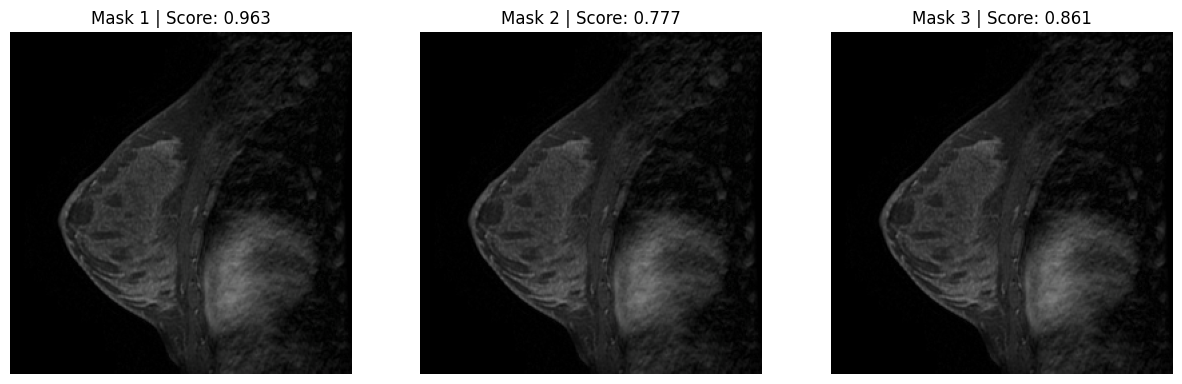

In [3]:
# Step 3️⃣: 可视化 mask
def show_mask(mask, ax, color):
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * np.array(color).reshape(1, 1, -1)
    ax.imshow(mask_image, alpha=0.5)

# Step 4️⃣: 显示所有候选 mask
plt.figure(figsize=(15, 5))
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    show_mask(mask, plt.gca(), color=[0, 1, 0])  # 绿色透明遮罩
    plt.title(f"Mask {i+1} | Score: {score:.3f}")
    plt.axis("off")
plt.show()


In [4]:
best_mask = masks[np.argmax(scores)]

# 保存 mask 到文件
os.makedirs("DIP Project/outputs", exist_ok=True)
mask_path = "DIP Project/outputs/mask_best.png"

plt.imsave(mask_path, best_mask, cmap="gray")
print("✅ 分割结果已保存：", mask_path)


✅ 分割结果已保存： DIP Project/outputs/mask_best.png


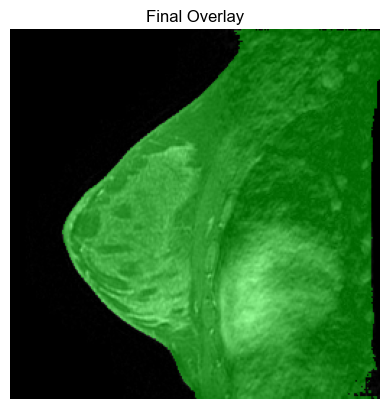

In [7]:
overlay = image.copy()
overlay[best_mask==1] = [0,255,0]  # mask 区域上色

alpha = 0.4
blended = (image * 255 * (1-alpha) + overlay * alpha).astype(np.uint8)
cv2.imwrite("DIP Project/outputs/overlay_correct.png", cv2.cvtColor(blended, cv2.COLOR_RGB2BGR))
plt.imshow(blended)
plt.title("Final Overlay")
plt.axis("off")
plt.show()


In [6]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 或 'Heiti TC', 'PingFang HK'
matplotlib.rcParams['axes.unicode_minus'] = False


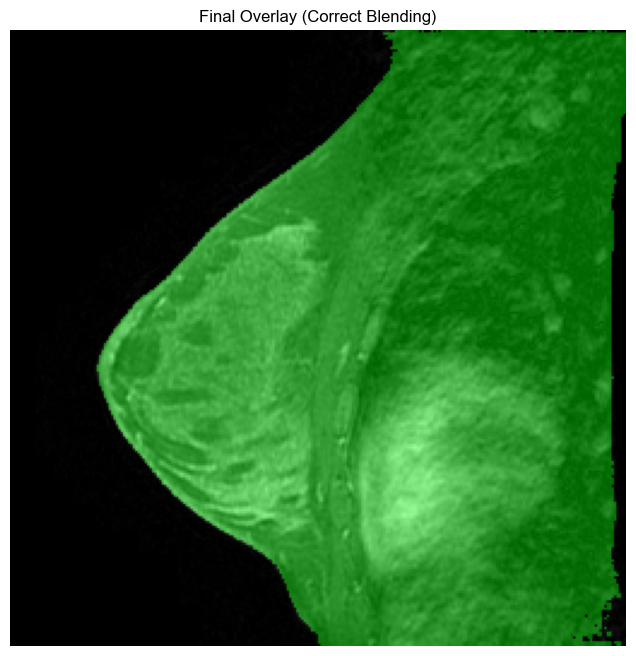

In [8]:
import cv2, numpy as np, matplotlib.pyplot as plt, os

# --- 确保 image 在 0-1 范围内的 RGB ---
image_rgb = (image * 255).astype(np.uint8)

# --- 生成绿色 mask 层 ---
mask_color = np.zeros_like(image_rgb)
mask_color[best_mask == 1] = [0, 255, 0]  # 绿色区域

# --- 混合叠加（加权平均）---
alpha = 0.4  # 透明度
overlay = cv2.addWeighted(image_rgb, 1-alpha, mask_color, alpha, 0)

# --- 保存 ---
os.makedirs("DIP Project/outputs", exist_ok=True)
cv2.imwrite("DIP Project/outputs/overlay_fixed.png", cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR))

# --- 显示 ---
plt.figure(figsize=(8,8))
plt.imshow(overlay)
plt.axis('off')
plt.title("Final Overlay (Correct Blending)")
plt.show()


In [23]:
import pydicom
from pydicom.data import get_testdata_file

dicom_path = "Users/shenyuyu/DIP Project/data/Unknown-yes.dcm"

ds = pydicom.dcmread("/Users/shenyuyu/DIP Project/data/Unknown-yes.dcm")

print("📋 全部 DICOM 元数据：\n")
print(ds)  

print("\n==============================")
print("🩺 关键字段预览：")
print(f"Patient ID: {ds.get('PatientID', 'N/A')}")
print(f"Patient Name: {ds.get('PatientName', 'N/A')}")
print(f"Study Date: {ds.get('StudyDate', 'N/A')}")
print(f"Modality: {ds.get('Modality', 'N/A')}")
print(f"Body Part Examined: {ds.get('BodyPartExamined', 'N/A')}")
print(f"Manufacturer: {ds.get('Manufacturer', 'N/A')}")

📋 全部 DICOM 元数据：

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 196
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.9203.4002.271756394853334189529035656952
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'PROCESSED']
(0008,0012) Instance Creation Date              DA: '20020810'
(0008,0013) Instance Creation Time              TM: '132837'
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) 

In [1]:
import os
import pydicom
import pandas as pd

# === 设置 DICOM 文件夹路径 ===
dicom_folder = "DIP Project/data"  

# === 扫描该文件夹中的所有 DICOM 文件 ===
dicom_files = [os.path.join(dicom_folder, f) for f in os.listdir(dicom_folder) if f.lower().endswith(".dcm")]

if not dicom_files:
    raise FileNotFoundError(f" 没有在 {dicom_folder} 找到 DICOM 文件！")

print(f" 找到 {len(dicom_files)} 个 DICOM 文件\n")

# === 定义一个函数：读取并打印全部 metadata + UID ===
all_metadata = []  # 用来存放每个文件的所有信息（后面导出 CSV 用）

for path in dicom_files:
    print("=" * 80)
    print(f"📄 文件: {os.path.basename(path)}")
    print("-" * 80)

    try:
        ds = pydicom.dcmread(path)

        # --- 打印全部 metadata ---
        print(ds)  # 这会显示全部 tag, name, value

        # --- 显示关键 UID 信息 ---
        study_uid = ds.get("StudyInstanceUID", "N/A")
        series_uid = ds.get("SeriesInstanceUID", "N/A")
        sop_uid = ds.get("SOPInstanceUID", "N/A")

        print("\n🧩 UID 信息：")
        print(f"  StudyInstanceUID : {study_uid}")
        print(f"  SeriesInstanceUID: {series_uid}")
        print(f"  SOPInstanceUID   : {sop_uid}")
        print("-" * 80)

        # --- 保存所有 metadata 为键值对 ---
        metadata_dict = {elem.keyword: str(elem.value) for elem in ds if elem.keyword}
        metadata_dict.update({
            "FileName": os.path.basename(path),
            "StudyInstanceUID": study_uid,
            "SeriesInstanceUID": series_uid,
            "SOPInstanceUID": sop_uid
        })
        all_metadata.append(metadata_dict)

    except Exception as e:
        print(f"无法读取 {path}: {e}")


/Applications/anaconda3/envs/dip_env/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'DIP Project/data'